

---



---

#  Nonlinear SVM Classification



---



---

Nonlinear SVM classification is a powerful technique used for classification tasks where the relationship between features and the target variable is nonlinear. It employs kernel functions to transform the original feature space into a higher-dimensional space where the classes become linearly separable. This allows SVMs to capture complex decision boundaries and achieve better classification performance on nonlinear datasets.

In this notebook, we will apply nonlinear SVM classification to two different datasets: the iris dataset and the make_moons dataset.

#Use the iris Dataset

This code loads the iris dataset, selects petal length and width features for setosa and versicolor classes, and trains a linear SVM classifier on these features.

In [8]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
# Load the iris dataset
iris = datasets.load_iris()

# Select petal length and petal width features for setosa and versicolor classes
X = iris["data"][:, (2, 3)]
y = iris["target"]

# Keep only setosa and versicolor classes
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Train a linear SVM classifier
svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(X, y)


SVC(kernel='linear')

#Use the make_moons Dataset
This code generates a moon-shaped synthetic dataset and plots it using Matplotlib.

The `make_moons` dataset is a toy dataset provided by scikit-learn, designed for binary classification problems with two interleaving half circles (moons). It's particularly useful for visualizing and testing classification algorithms on datasets that are not linearly separable.

For more information and examples on how to use the `make_moons` dataset, you can visit the [make_moons documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).


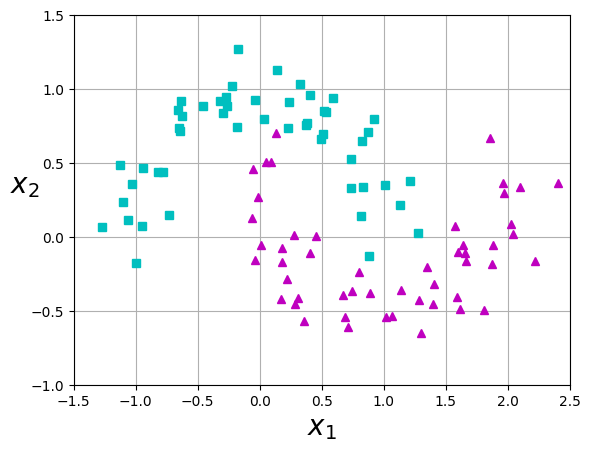

In [26]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate moons dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Define a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "cs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "m^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Plot the dataset
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


This code creates a pipeline for a Polynomial SVM Classifier and fits it to the data.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Create a pipeline for Polynomial SVM Classifier
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

# Fit the pipeline to the data
polynomial_svm_clf.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

This code plots the decision boundary and decision function values of a Polynomial SVM Classifier on the moons dataset.

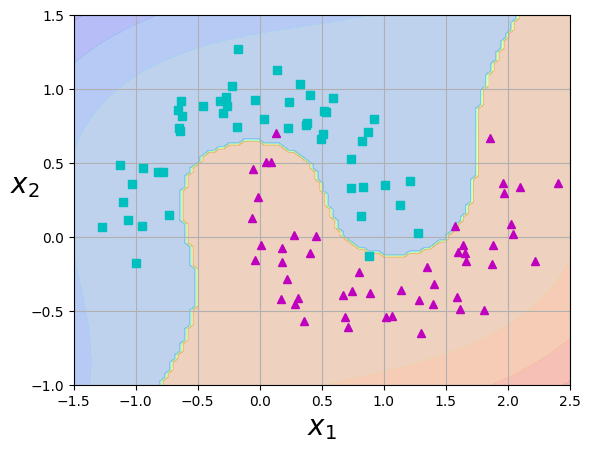

In [28]:
 # Define a function to plot the decision boundary and decision function values of a classifier
def plot_predictions(clf, axes):
    # Generate a mesh grid for the given axes boundaries
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]  # Create input features from the mesh grid
    y_pred = clf.predict(X).reshape(x0.shape)  # Predict classes for each point on the mesh grid
    y_decision = clf.decision_function(X).reshape(x0.shape)  # Compute decision function values
    # Plot decision boundary and decision function values
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.jet, alpha=0.2)  # Decision boundary
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.jet, alpha=0.1)  # Decision function values

# Plot predictions of the Polynomial SVM Classifier on the moons dataset
# plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
# plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])  # Overlay dataset points
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])  # Overlay dataset points

# Save and display the plot
plt.show()
